### 0. Load Package 📦

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import make_pipeline
from scipy import stats
import re
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
import warnings

### 0.5. Preparing Environment ⛑️

In [17]:
# 1. Load dataset
a_z_medicines_dataset = pd.read_csv('meds.csv')
not_clean = pd.read_csv('meds.csv')

warnings.filterwarnings("ignore")

# 2. Display the DataFrame to check the data
a_z_medicines_dataset

,id,name,price(₹),Is_discontinued,manufacturer_name,type,pack_size_label,short_composition1,short_composition2
0,1,Augmentin 625 Duo Tablet,223.42,False,Glaxo SmithKline Pharmaceuticals Ltd,allopathy,strip of 10 tablets,Amoxycillin (500mg),Clavulanic Acid (125mg)
1,2,Azithral 500 Tablet,132.36,False,Alembic Pharmaceuticals Ltd,allopathy,strip of 5 tablets,Azithromycin (500mg),NaN
2,3,Ascoril LS Syrup,118.00,False,Glenmark Pharmaceuticals Ltd,allopathy,bottle of 100 ml Syrup,Ambroxol (30mg/5ml),Levosalbutamol (1mg/5ml)
3,4,Allegra 120mg Tablet,218.81,False,Sanofi India Ltd,allopathy,strip of 10 tablets,Fexofenadine (120mg),NaN
4,5,Avil 25 Tablet,10.96,False,Sanofi India Ltd,allopathy,strip of 15 tablets,Pheniramine (25mg),NaN
...,...,...,...,...,...,...,...,...,...
253968,253969,Ziyapod 100mg Oral Suspension,62.30,False,Ziyana Lifesciences Pvt Ltd,allopathy,bottle of 30 ml Oral Suspension,Cefpodoxime Proxetil (100mg),NaN
253969,253970,Zemhart 30mg Tablet,54.00,False,Leeford Healthcare Ltd,allopathy,strip of 10 tablets,Diltiazem (30mg),NaN
253970,253971,Zivex 25mg Tablet,57.00,False,Euro Organics,allopathy,strip of 10 tablets,Hydroxyzine (25mg),NaN
253971,253972,ZI Fast 500mg Injection,152.00,False,Burgeon Health Series Private Limited,allopathy,vial of 1 Injection,Azithromycin (500mg),NaN


### 1. Data Understanding 📊

In [18]:
# Cek Sampel data
a_z_medicines_dataset.head()

,id,name,price(₹),Is_discontinued,manufacturer_name,type,pack_size_label,short_composition1,short_composition2
0,1,Augmentin 625 Duo Tablet,223.42,False,Glaxo SmithKline Pharmaceuticals Ltd,allopathy,strip of 10 tablets,Amoxycillin (500mg),Clavulanic Acid (125mg)
1,2,Azithral 500 Tablet,132.36,False,Alembic Pharmaceuticals Ltd,allopathy,strip of 5 tablets,Azithromycin (500mg),NaN
2,3,Ascoril LS Syrup,118.00,False,Glenmark Pharmaceuticals Ltd,allopathy,bottle of 100 ml Syrup,Ambroxol (30mg/5ml),Levosalbutamol (1mg/5ml)
3,4,Allegra 120mg Tablet,218.81,False,Sanofi India Ltd,allopathy,strip of 10 tablets,Fexofenadine (120mg),NaN
4,5,Avil 25 Tablet,10.96,False,Sanofi India Ltd,allopathy,strip of 15 tablets,Pheniramine (25mg),NaN


In [19]:
# Cek Informasi data
a_z_medicines_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253973 entries, 0 to 253972
Data columns (total 9 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  253973 non-null  int64  
 1   name                253973 non-null  object 
 2   price(₹)            253973 non-null  float64
 3   Is_discontinued     253973 non-null  bool   
 4   manufacturer_name   253973 non-null  object 
 5   type                253973 non-null  object 
 6   pack_size_label     253973 non-null  object 
 7   short_composition1  253973 non-null  object 
 8   short_composition2  112171 non-null  object 
dtypes: bool(1), float64(1), int64(1), object(6)
memory usage: 15.7+ MB


In [20]:
# Deskripsi tabel numerik
a_z_medicines_dataset.describe()

,id,price(₹)
count,253973.000000,253973.000000
mean,126987.000000,270.530844
std,73315.834296,3029.584134
min,1.000000,0.000000
25%,63494.000000,48.000000
50%,126987.000000,79.000000
75%,190480.000000,140.000000
max,253973.000000,436000.000000


### 2. Data Cleansing dan Preprocessing 🧹

In [21]:
# Mengubah string kosong menjadi NaN
a_z_medicines_dataset['short_composition2'].replace('', pd.NA, inplace=True)
a_z_medicines_dataset['short_composition2'].replace(' ', pd.NA, inplace=True)

# Menghitung persen missing data masing-masing kolom
missing_percentage = a_z_medicines_dataset.isnull().sum() / len(a_z_medicines_dataset) * 100
missing_percentage

id                     0.000000
name                   0.000000
price(₹)               0.000000
Is_discontinued        0.000000
manufacturer_name      0.000000
type                   0.000000
pack_size_label        0.000000
short_composition1     0.000000
short_composition2    55.833494
dtype: float64

Ternyata, kolom **short_composition2** memiliki data yang hilang hingga **55%** 😱😱. Namun, karena kolom ini penting untuk model yang akan dibangun, kita tidak akan menghapusnya. Sebagai gantinya, kolom ini akan tetap dipertahankan, dan penanganan data yang hilang akan dilakukan saat proses pemodelan.

#### 2.1 Menghapus obat-obat yang telah discontinue 🗑️

In [22]:
# Mengonversi kolom 'Is_discontinued' dari string ke boolean
a_z_medicines_dataset.loc[:, 'Is_discontinued'] = a_z_medicines_dataset['Is_discontinued'].replace({'TRUE': True, 'FALSE': False})

# Menghapus obat yang telah discontinue
a_z_medicines_dataset.drop(a_z_medicines_dataset[a_z_medicines_dataset['Is_discontinued'] == True].index, inplace=True)

a_z_medicines_dataset

,id,name,price(₹),Is_discontinued,manufacturer_name,type,pack_size_label,short_composition1,short_composition2
0,1,Augmentin 625 Duo Tablet,223.42,False,Glaxo SmithKline Pharmaceuticals Ltd,allopathy,strip of 10 tablets,Amoxycillin (500mg),Clavulanic Acid (125mg)
1,2,Azithral 500 Tablet,132.36,False,Alembic Pharmaceuticals Ltd,allopathy,strip of 5 tablets,Azithromycin (500mg),NaN
2,3,Ascoril LS Syrup,118.00,False,Glenmark Pharmaceuticals Ltd,allopathy,bottle of 100 ml Syrup,Ambroxol (30mg/5ml),Levosalbutamol (1mg/5ml)
3,4,Allegra 120mg Tablet,218.81,False,Sanofi India Ltd,allopathy,strip of 10 tablets,Fexofenadine (120mg),NaN
4,5,Avil 25 Tablet,10.96,False,Sanofi India Ltd,allopathy,strip of 15 tablets,Pheniramine (25mg),NaN
...,...,...,...,...,...,...,...,...,...
253968,253969,Ziyapod 100mg Oral Suspension,62.30,False,Ziyana Lifesciences Pvt Ltd,allopathy,bottle of 30 ml Oral Suspension,Cefpodoxime Proxetil (100mg),NaN
253969,253970,Zemhart 30mg Tablet,54.00,False,Leeford Healthcare Ltd,allopathy,strip of 10 tablets,Diltiazem (30mg),NaN
253970,253971,Zivex 25mg Tablet,57.00,False,Euro Organics,allopathy,strip of 10 tablets,Hydroxyzine (25mg),NaN
253971,253972,ZI Fast 500mg Injection,152.00,False,Burgeon Health Series Private Limited,allopathy,vial of 1 Injection,Azithromycin (500mg),NaN


#### 2.2 Menyamakan format komposisi yang terdapat dalam obat 🖊️

In [23]:
# Fungsi untuk membersihkan komposisi
def clean_composition(composition):
    # Cek apakah nilai adalah pd.NA atau NaN, jika iya, kembalikan nilai tersebut
    if pd.isna(composition):
        return composition
    # Menghilangkan spasi berlebih di antara kata-kata
    cleaned = ' '.join(composition.split())
    return cleaned

# Menerapkan fungsi ke kolom `short_composition1` dan `short_composition2`
a_z_medicines_dataset['short_composition1'] = a_z_medicines_dataset['short_composition1'].apply(clean_composition)
a_z_medicines_dataset['short_composition2'] = a_z_medicines_dataset['short_composition2'].apply(clean_composition)

# Memeriksa hasil pembersihan data
a_z_medicines_dataset[['short_composition1', 'short_composition2']]


,short_composition1,short_composition2
0,Amoxycillin (500mg),Clavulanic Acid (125mg)
1,Azithromycin (500mg),NaN
2,Ambroxol (30mg/5ml),Levosalbutamol (1mg/5ml)
3,Fexofenadine (120mg),NaN
4,Pheniramine (25mg),NaN
...,...,...
253968,Cefpodoxime Proxetil (100mg),NaN
253969,Diltiazem (30mg),NaN
253970,Hydroxyzine (25mg),NaN
253971,Azithromycin (500mg),NaN


### Feature Engineering (menggabungkan kolom yang ingin ditemukan *similarity*-nya) ✂️

In [24]:
a_z_medicines_dataset['features'] = a_z_medicines_dataset['short_composition1'].fillna('') + ' ' + a_z_medicines_dataset['short_composition2'].fillna('') + ' ' + a_z_medicines_dataset['type'].fillna('')

### 3. Exploratory Data Analysis 📊

#### 3.1 Menampilkan statistik data 🧮

In [25]:
a_z_medicines_dataset.describe(include='all')

,id,name,price(₹),Is_discontinued,manufacturer_name,type,pack_size_label,short_composition1,short_composition2,features
count,246068.000000,246068,246068.000000,246068,246068,246068,246068,246068,109320,246068
unique,NaN,241990,NaN,1,7641,1,1833,7048,2443,11235
top,NaN,NS 0.9% Infusion,NaN,False,Sun Pharmaceutical Industries Ltd,allopathy,strip of 10 tablets,Aceclofenac (100mg),Paracetamol (325mg),Aceclofenac (100mg) Paracetamol (325mg) allopathy
freq,NaN,12,NaN,246068,2542,246068,113292,7128,8843,4661
mean,126935.018954,NaN,265.002121,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,73290.867376,NaN,3028.003408,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.000000,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,63453.750000,NaN,48.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,126870.500000,NaN,79.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,190445.250000,NaN,140.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### 3.2 Menampilkan distribusi obat yang masih diproduksi dan tidak 👩‍🔬

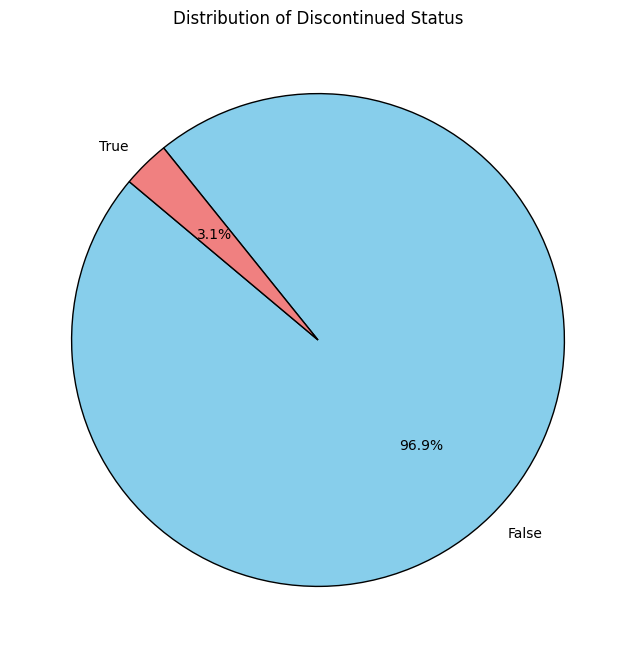

In [26]:
discontinued_counts = not_clean['Is_discontinued'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(discontinued_counts, labels=discontinued_counts.index, autopct='%1.1f%%', colors=['skyblue', 'lightcoral'], startangle=140, wedgeprops={'edgecolor': 'black'})

# Add a title
plt.title('Distribution of Discontinued Status')

# Show the plot
plt.show()

#### 3.3 Menampilkan kemunculan komposisi obat terbanyak 🧪📈

Top 20 Most Common Compositions:
Paracetamol         17285
Aceclofenac          9000
Domperidone          8898
Cefixime             8828
Ofloxacin            8644
Clavulanic           8403
Amoxycillin          8375
Metformin            7609
Rabeprazole          7248
Ceftriaxone          6133
Levocetirizine       6124
Diclofenac           6046
Cefpodoxime          6016
Pantoprazole         5836
Azithromycin         5431
Glimepiride          5134
Montelukast          4845
Telmisartan          4211
Methylcobalamin      3981
Chlorpheniramine     3824
Name: count, dtype: int64


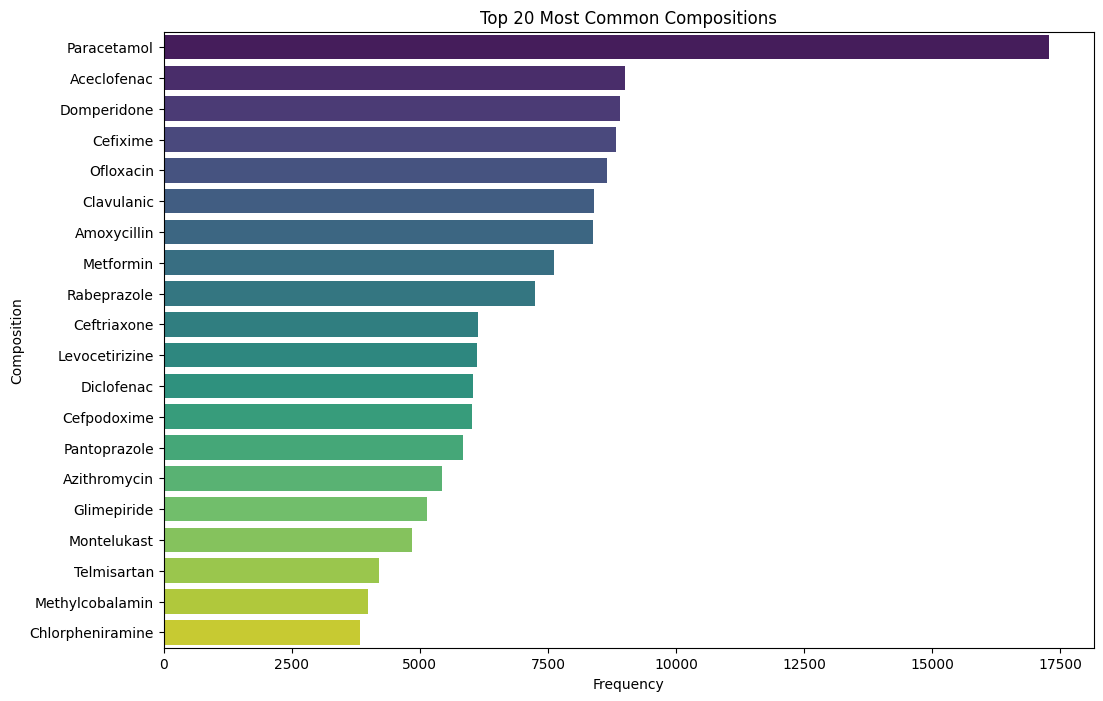

In [27]:
# Mengambil nama komposisi obat
def extract_first_word(composition):
    if pd.notnull(composition):
        return composition.split()[0]
    return None

# Menerapkan fungsi mengambil nama komposisi obat
a_z_medicines_dataset['first_word_composition1'] = a_z_medicines_dataset['short_composition1'].apply(extract_first_word)
a_z_medicines_dataset['first_word_composition2'] = a_z_medicines_dataset['short_composition2'].apply(extract_first_word)

# Menggabungkan data komposisi 1 dan 2
composition_series = pd.concat([a_z_medicines_dataset['first_word_composition1'], a_z_medicines_dataset['first_word_composition2']], ignore_index=True)

# Drop nilai kosong
composition_series = composition_series.dropna()

# Menghitung frekuensi kemunculan komposisi
composition_counts = composition_series.value_counts().head(20)  # Top 20 most common compositions

# Menunjukkan 20 obat paling sering muncul
print("Top 20 Most Common Compositions:")
print(composition_counts)

# Visualisasi 20 obat paling sering muncul
plt.figure(figsize=(12, 8))
sns.barplot(x=composition_counts.values, y=composition_counts.index, palette='viridis')
plt.title('Top 20 Most Common Compositions')
plt.xlabel('Frequency')
plt.ylabel('Composition')
plt.show()

#### 3.4 Menampilkan kemunculan komposisi obat tersedikit 🧪📉

Top 20 Rarest Compositions:
Ceritinib        1
Polystyrene      1
Cholera          1
Colfosceril      1
Basiliximab      1
Yellow           1
Secukinumab      1
Trimipramine     1
Almagate         1
Amineptine       1
Ribociclib       1
Pembrolizumab    1
Finerenone       1
Saquinavir       1
Hydrochloride    1
Golimumab        1
Erenumab         1
Cladribine       1
Extractum        1
Avibactam        1
Name: count, dtype: int64


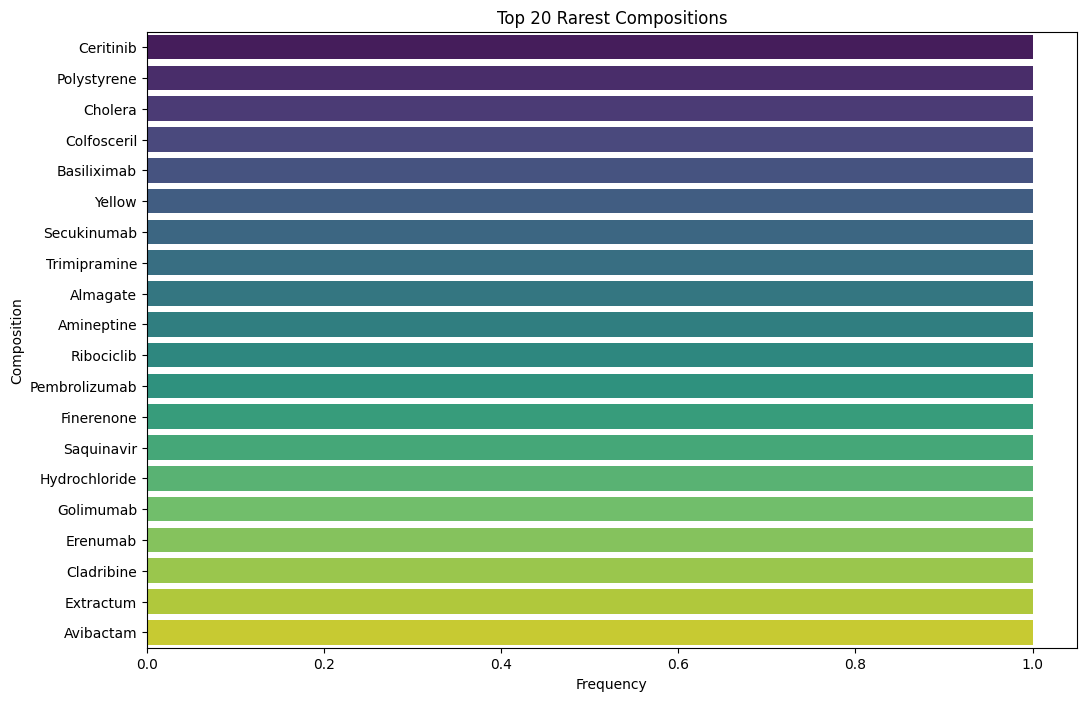

In [28]:
# Menghitung frekuensi kemunculan komposisi
least_composition_counts = composition_series.value_counts().tail(20)

# Menunjukkan 20 obat paling jarang muncul
print("Top 20 Rarest Compositions:")
print(least_composition_counts)

# Visualisasi 20 obat paling jarang muncul
plt.figure(figsize=(12, 8))
sns.barplot(x=least_composition_counts.values, y=least_composition_counts.index, palette='viridis')
plt.title('Top 20 Rarest Compositions')
plt.xlabel('Frequency')
plt.ylabel('Composition')
plt.show()

#### 3.5 Menampilkan distribusi harga per persentil 💸

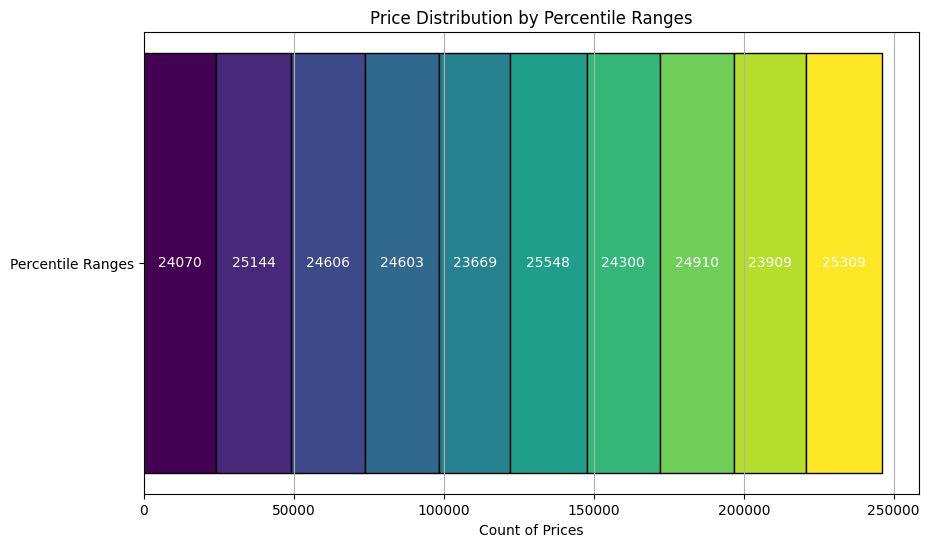

In [29]:
percentiles = np.percentile(a_z_medicines_dataset['price(₹)'].dropna(), [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100])

# Count the number of observations within each percentile range
counts = []
for i in range(len(percentiles) - 1):
    count = ((a_z_medicines_dataset['price(₹)'] >= percentiles[i]) & (a_z_medicines_dataset['price(₹)'] < percentiles[i + 1])).sum()
    counts.append(count)

# Add the count for the last range (inclusive of the maximum value)
counts[-1] += (a_z_medicines_dataset['price(₹)'] == percentiles[-1]).sum()

# Percentile range labels
labels = ['0-10th', '10-20th', '20-30th', '30-40th', '40-50th',
          '50-60th', '60-70th', '70-80th', '80-90th', '90-100th']

# Define colors for each segment
colors = plt.cm.viridis(np.linspace(0, 1, len(labels)))

# Create a stacked horizontal bar chart
plt.figure(figsize=(10, 6))
plt.barh(y=[0], width=counts, left=np.cumsum([0] + counts[:-1]),
         color=colors, edgecolor='black', height=0.5)

# Add the count labels on top of each bar segment
for i in range(len(counts)):
    plt.text(np.cumsum([0] + counts)[i] + counts[i] / 2, 0, str(counts[i]), ha='center', va='center', color='white', fontsize=10)

plt.title('Price Distribution by Percentile Ranges')
plt.xlabel('Count of Prices')
plt.yticks([0], ['Percentile Ranges'])
plt.grid(axis='x')
plt.show()

Keterangan: Setiap warna menandakan masing-masing persentil. Dari kiri ke kanan, berurut dari persentil 0 - 100.

#### 3.6 Visualisasi Komposisi Obat Terbanyak dari Suatu Jangkauan Persentil 🕶️

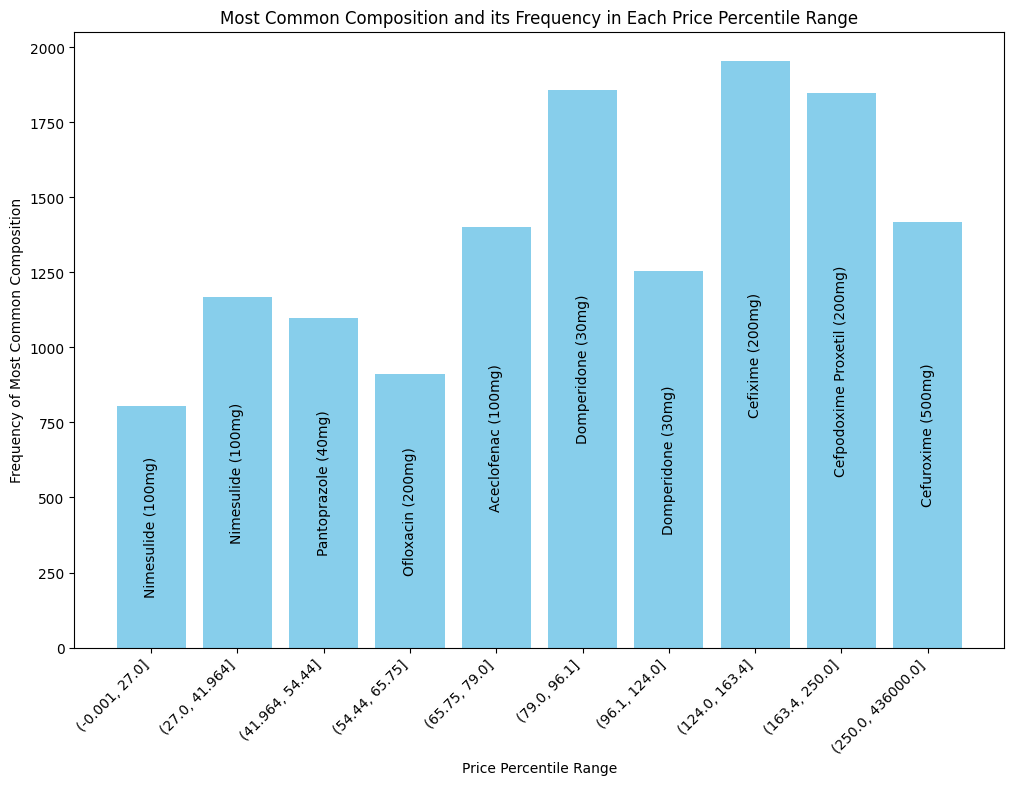

In [30]:
# Menghitung persentil
percentile_ranges = pd.qcut(a_z_medicines_dataset['price(₹)'], 10)

# Label x
a_z_medicines_dataset['price_percentile'] = pd.qcut(a_z_medicines_dataset['price(₹)'], 10, labels=False)

# Komposisi terbanyak pada range persentil tertentu
most_common_composition = a_z_medicines_dataset.groupby('price_percentile')['short_composition1'] \
    .agg(lambda x: x.value_counts().idxmax())
most_common_frequency = a_z_medicines_dataset.groupby('price_percentile')['short_composition1'] \
    .agg(lambda x: x.value_counts().max())

# Visualisasi
plt.figure(figsize=(12, 8))
bars = plt.bar(most_common_composition.index, most_common_frequency, tick_label=percentile_ranges.cat.categories, color='skyblue')

plt.title('Most Common Composition and its Frequency in Each Price Percentile Range')
plt.xlabel('Price Percentile Range')
plt.ylabel('Frequency of Most Common Composition')

# Legend
for bar, comp in zip(bars, most_common_composition.values):
    plt.text(
        bar.get_x() + bar.get_width() / 2,  
        bar.get_height() / 2,               
        comp,                               
        ha='center', va='center',           
        fontsize=10, color='black',         
        rotation=90                         
    )

plt.xticks(rotation=45, ha='right')
plt.show()

### 4. Model 🪄

In [31]:
# User input
recommended_medicine = input("Enter the name of the medicine recommended by the doctor: ")
budget = input("Enter your maximum budget (₹): ")
allergies = input("Enter a list of allergies (separated by commas): ").split(',')
desired_form = input("Enter the desired form of the medicine (e.g., tablet, syrup, etc.): ")

# Alergi pengguna
allergies = [re.escape(a.strip()) for a in allergies]

Enter the name of the medicine recommended by the doctor:  Dispar 500mg Syrup
Enter your maximum budget (₹):  90
Enter a list of allergies (separated by commas):  Diclofenac
Enter the desired form of the medicine (e.g., tablet, syrup, etc.):  tablet


In [32]:
def get_ref_compositions(row):
    ref_compositions = []
    if isinstance(row['short_composition1'], str):
        ref_compositions.append(row['short_composition1'].strip())
    if isinstance(row['short_composition2'], str):
        ref_compositions.append(row['short_composition2'].strip())
    return ref_compositions

# Fungsi menghitung similarity
def calculate_similarity(row, ref_compositions, ref_pack_size):
    score = 0
    composition1 = ref_compositions[0]
    testcomp = get_ref_compositions(row)
    if len(ref_compositions) > 1:
        composition2 = ref_compositions[1]
    else:
        composition2 = "None"
    if len(testcomp) == 1:
        testcomp.append("None")

    if composition1 == row['short_composition1'] and composition2 == testcomp[1]:
        score += 0.9
    elif composition1 == row['short_composition1'] or composition2 == testcomp[1]:
        score += 0.6
    if score > 0 and ref_pack_size and ref_pack_size.lower() in row['pack_size_label'].lower():
        score += 0.05

    return score

row_search = None
pack_size_label = None

for index, row in a_z_medicines_dataset.iterrows():
    if (row['name'] == recommended_medicine):
        row_search = row
        pack_size_label = row_search['pack_size_label']
        break

a_z_medicines_dataset['similarity_score'] = a_z_medicines_dataset.apply(lambda row: calculate_similarity(row, get_ref_compositions(row_search), pack_size_label), axis=1)

similarity_threshold = 0.7
a_z_medicines_dataset['Target'] = a_z_medicines_dataset['similarity_score'].apply(lambda x: 1 if x >= similarity_threshold else 0)

In [33]:
features = a_z_medicines_dataset[['features']]
target = a_z_medicines_dataset['Target']

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

text_transformer = TfidfVectorizer(max_features=5000)

pipeline = Pipeline(steps=[
    ('vectorizer', text_transformer),
    ('classifier', RandomForestClassifier())
])

param_grid = {
    'classifier__n_estimators': [100, 200, 300],
    'classifier__max_depth': [10, 20, 30],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4],
    'classifier__bootstrap': [True, False]
}

grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train['features'], y_train)

best_params = grid_search.best_params_
print("Best Parameters:", best_params)

y_pred = grid_search.best_estimator_.predict(X_test['features'])
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy on Test Data:", accuracy)

final_model = grid_search.best_estimator_
final_model.fit(X_train['features'], y_train)

y_final_pred = final_model.predict(X_test['features'])
final_accuracy = accuracy_score(y_test, y_final_pred)
print("Final Model Accuracy:", final_accuracy)

Fitting 5 folds for each of 162 candidates, totalling 810 fits
Best Parameters: {'classifier__bootstrap': True, 'classifier__max_depth': 20, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 100}
Accuracy on Test Data: 1.0
Final Model Accuracy: 1.0


In [34]:
target_filtered_data = a_z_medicines_dataset[a_z_medicines_dataset['Target'] == 1]
print(f"After target filter: {len(target_filtered_data)} medicines match")

budget_filtered_data = target_filtered_data[target_filtered_data['price(₹)'] <= float(budget)]
print(f"After budget filter: {len(budget_filtered_data)} medicines match")

if len(allergies) == 1 and allergies[0] != '':
    allergy_filtered_data = budget_filtered_data[
        (~budget_filtered_data['short_composition1'].fillna('').str.contains('|'.join(allergies), case=False, na=False)) &
        (~budget_filtered_data['short_composition2'].fillna('').str.contains('|'.join(allergies), case=False, na=False))
    ]
    print(f"After allergy filter: {len(allergy_filtered_data)} medicines match")
else:
    allergy_filtered_data = budget_filtered_data

form_filtered_data = allergy_filtered_data[
    allergy_filtered_data['pack_size_label'].str.contains(desired_form, case=False, na=False)
]
print(f"After form filter: {len(form_filtered_data)} medicines match")

recommendations = form_filtered_data.sort_values(by=['similarity_score', 'price(₹)'], ascending=[False, True]).head(10)

if not recommendations.empty:
    print("\nMedicines recommended based on your input:")
    print(recommendations[['name', 'price(₹)', 'pack_size_label', 'similarity_score', 'short_composition1', 'short_composition2', 'type']])
else:
    print("No medicines match the criteria provided.")

After target filter: 251 medicines match
After budget filter: 245 medicines match
After allergy filter: 245 medicines match
After form filter: 238 medicines match

Medicines recommended based on your input:
                         name  price(₹)      pack_size_label  \
30135    Babymol 500mg Tablet      2.50  strip of 10 tablets   
3143    Anglopar 500mg Tablet      2.86  strip of 10 tablets   
71126     Dagmol 500mg Tablet      2.90  strip of 10 tablets   
142968  Metalgin 500mg Tablet      3.18  strip of 10 tablets   
41732    Cachpar 500mg Tablet      3.37  strip of 10 tablets   
179802   Paralab 500mg Tablet      3.37  strip of 10 tablets   
1964        Amol 500mg Tablet      3.56  strip of 10 tablets   
23250   Adcopara 500mg Tablet      3.80   strip of 2 tablets   
177145   Parador 500mg Tablet      4.00  strip of 10 tablets   
8723      Animol 500mg Tablet      4.70  strip of 10 tablets   

        similarity_score   short_composition1 short_composition2       type  
30135     

In [35]:
def predict_for_new_input(short_composition1, short_composition2, med_type, model):
    input_data = pd.DataFrame({
        'features': [short_composition1 + ' ' + short_composition2 + ' ' + med_type]
    })
    
    prediction = model.predict(input_data['features'])
    
    # Output
    return prediction[0]

# Contoh penggunaan model
user_short_composition1 = "Paracetamol (500mg)"
user_short_composition2 = "None"
user_type = "allopathy"

# Predict
predicted_class = predict_for_new_input(user_short_composition1, user_short_composition2, user_type, final_model)

# Hasil kolom target
print(f"Predicted class for the new input: {predicted_class}")

Predicted class for the new input: 1
[CV] END classifier__bootstrap=True, classifier__max_depth=10, classifier__min_samples_leaf=1, classifier__min_samples_split=2, classifier__n_estimators=100; total time=   3.3s
[CV] END classifier__bootstrap=True, classifier__max_depth=10, classifier__min_samples_leaf=1, classifier__min_samples_split=5, classifier__n_estimators=100; total time=   3.7s
[CV] END classifier__bootstrap=True, classifier__max_depth=10, classifier__min_samples_leaf=1, classifier__min_samples_split=5, classifier__n_estimators=200; total time=   4.2s
[CV] END classifier__bootstrap=True, classifier__max_depth=10, classifier__min_samples_leaf=1, classifier__min_samples_split=10, classifier__n_estimators=200; total time=   4.0s
[CV] END classifier__bootstrap=True, classifier__max_depth=10, classifier__min_samples_leaf=2, classifier__min_samples_split=2, classifier__n_estimators=100; total time=   2.3s
[CV] END classifier__bootstrap=True, classifier__max_depth=10, classifier__mi